# 模型误差分析工具

这个notebook用于分析和比较多个模型的L1和L2误差。使用方法如下：

1. 在下面的代码单元中添加模型数据
2. 运行所有单元格即可看到比较结果

数据格式示例：
```python
model_errors = {
    "模型A": """
    L1 error: [0.1, 0.2, 0.3]
    L2 error: [0.2, 0.3, 0.4]
    """,
    "模型B": """
    L1 error: [0.2, 0.3, 0.4]
    L2 error: [0.3, 0.4, 0.5]
    """
}
```

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
model_errors = {
    "transformer 45w": """
    L1 error: [0.4987971403992503, 0.36863892587660463, 0.3616906258506311, 0.28828609372953223, 0.350067159766345, 0.33737652258264506, 0.34695774863325796, 0.3239160960893362, 0.4987566188005338, 0.3793142808341974]
    L2 error: [0.4884778697779949, 0.3733833130824047, 0.36778613740328286, 0.30065773271517265, 0.3579601406862813, 0.3477979507690462, 0.3575030235626508, 0.3337145677790097, 0.4880390977941786, 0.3813867981018937]
    """,
    "diffdecoder 45w": """
    L1 error: [0.40459851176959327, 0.36431083484816373, 0.36250601427457235, 0.49837886096966844, 0.3902925883144932, 0.34602289637207734, 0.37643410099683616, 0.3983929097077968, 0.4901286760490357, 0.3919198160066245]
    L2 error: [0.4054721890018167, 0.3704076900365791, 0.36923138810798384, 0.48773633725893983, 0.3910108187270323, 0.3539421874414939, 0.37952363749579193, 0.39950643328715507, 0.4791173476210368, 0.3940801615744421]
    """,


    "transformer 62w": """
    L1 error: [0.39113329836128297, 0.37908415942173374, 0.3727684531786117, 0.35374585938315967, 0.39770311501130123, 0.3855727225573009, 0.38324162693563657, 0.3369562647192458, 0.36269351487904056, 0.3556037619445144]
    L2 error: [0.3933683993582381, 0.38308368443088303, 0.37702701633163865, 0.3621962435090485, 0.3987600446639024, 0.38832958875443, 0.38603407080418295, 0.3465346503834316, 0.3675207679646031, 0.36136628526469045]
    """,
    
    "diffdecoder 62w": """
    L1 error: [0.4055084033189352, 0.39638261846882566, 0.39670122570464506, 0.38680511284153707, 0.3933844300304498, 0.41783574402722196, 0.38172056233916424, 0.40144063588755635, 0.40923071783540627, 0.39689755026832235]
    L2 error: [0.4054533444699661, 0.3980040448774021, 0.3985369556245492, 0.38963531508779936, 0.3948730511292661, 0.4142326448061492, 0.3850118617026096, 0.4022786189797228, 0.40746191443729846, 0.39788610493752813]
    """,
    
    
    
}

<Figure size 1500x800 with 0 Axes>

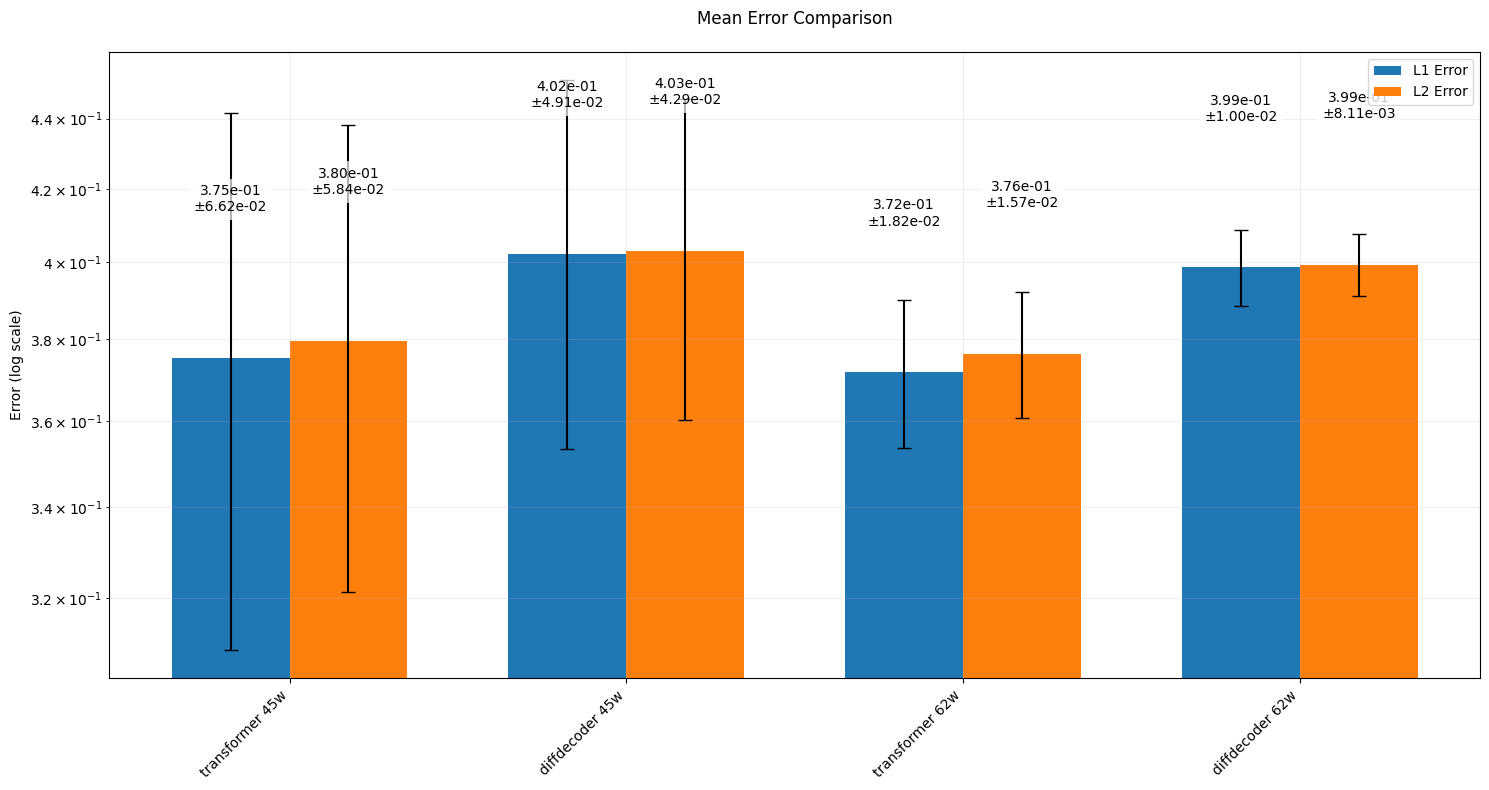


=== 统计结果汇总 ===

transformer 45w:
L1误差 - 均值: 3.753801e-01 ± 6.620318e-02
L2误差 - 均值: 3.796707e-01 ± 5.839527e-02

diffdecoder 45w:
L1误差 - 均值: 4.022985e-01 ± 4.907178e-02
L2误差 - 均值: 4.030028e-01 ± 4.286736e-02

transformer 62w:
L1误差 - 均值: 3.718503e-01 ± 1.817856e-02
L2误差 - 均值: 3.764221e-01 ± 1.570550e-02

diffdecoder 62w:
L1误差 - 均值: 3.985907e-01 ± 1.000739e-02
L2误差 - 均值: 3.993374e-01 ± 8.110107e-03


In [8]:
# 处理数据并创建均值标准差对比图
processed_data = {}
for model_name, model_text in model_errors.items():
    lines = model_text.strip().split('\n')
    for line in lines:
        line = line.strip()
        if "L1 error:" in line:
            l1_data = np.array(eval(line[line.find("["):line.find("]")+1]))
        elif "L2 error:" in line:
            l2_data = np.array(eval(line[line.find("["):line.find("]")+1]))
    processed_data[model_name] = {
        'L1': l1_data,
        'L2': l2_data
    }

# 创建均值和标准差对比图
plt.figure(figsize=(15, 8))
fig, ax = plt.subplots(figsize=(15, 8))

x = np.arange(len(processed_data))
width = 0.35

# 计算均值和标准差
means_l1 = [np.mean(data['L1']) for data in processed_data.values()]
stds_l1 = [np.std(data['L1']) for data in processed_data.values()]
means_l2 = [np.mean(data['L2']) for data in processed_data.values()]
stds_l2 = [np.std(data['L2']) for data in processed_data.values()]

# 绘制柱状图
bars1 = ax.bar(x - width/2, means_l1, width, yerr=stds_l1, 
               label='L1 Error', capsize=5)
bars2 = ax.bar(x + width/2, means_l2, width, yerr=stds_l2,
               label='L2 Error', capsize=5)

# 设置对数坐标
ax.set_yscale('log')

# 在柱状图上添加数值标签（使用原始值，不取对数）
def autolabel(rects, stds):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height * 1.1,
               f'{height:.2e}\n±{stds[i]:.2e}',
               ha='center', va='bottom', rotation=0,
               bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

autolabel(bars1, stds_l1)
autolabel(bars2, stds_l2)

ax.set_ylabel('Error (log scale)')
ax.set_title('Mean Error Comparison', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(list(processed_data.keys()), rotation=45, ha='right')
ax.legend(loc='upper right')
ax.grid(True, which="both", ls="-", alpha=0.2)

# 调整布局以防止标签被截断
plt.tight_layout()
plt.show()

# 打印详细的统计信息
print("\n=== 统计结果汇总 ===")
for model_name, data in processed_data.items():
    print(f"\n{model_name}:")
    print(f"L1误差 - 均值: {np.mean(data['L1']):.6e} ± {np.std(data['L1']):.6e}")
    print(f"L2误差 - 均值: {np.mean(data['L2']):.6e} ± {np.std(data['L2']):.6e}")

<Figure size 2000x1000 with 0 Axes>

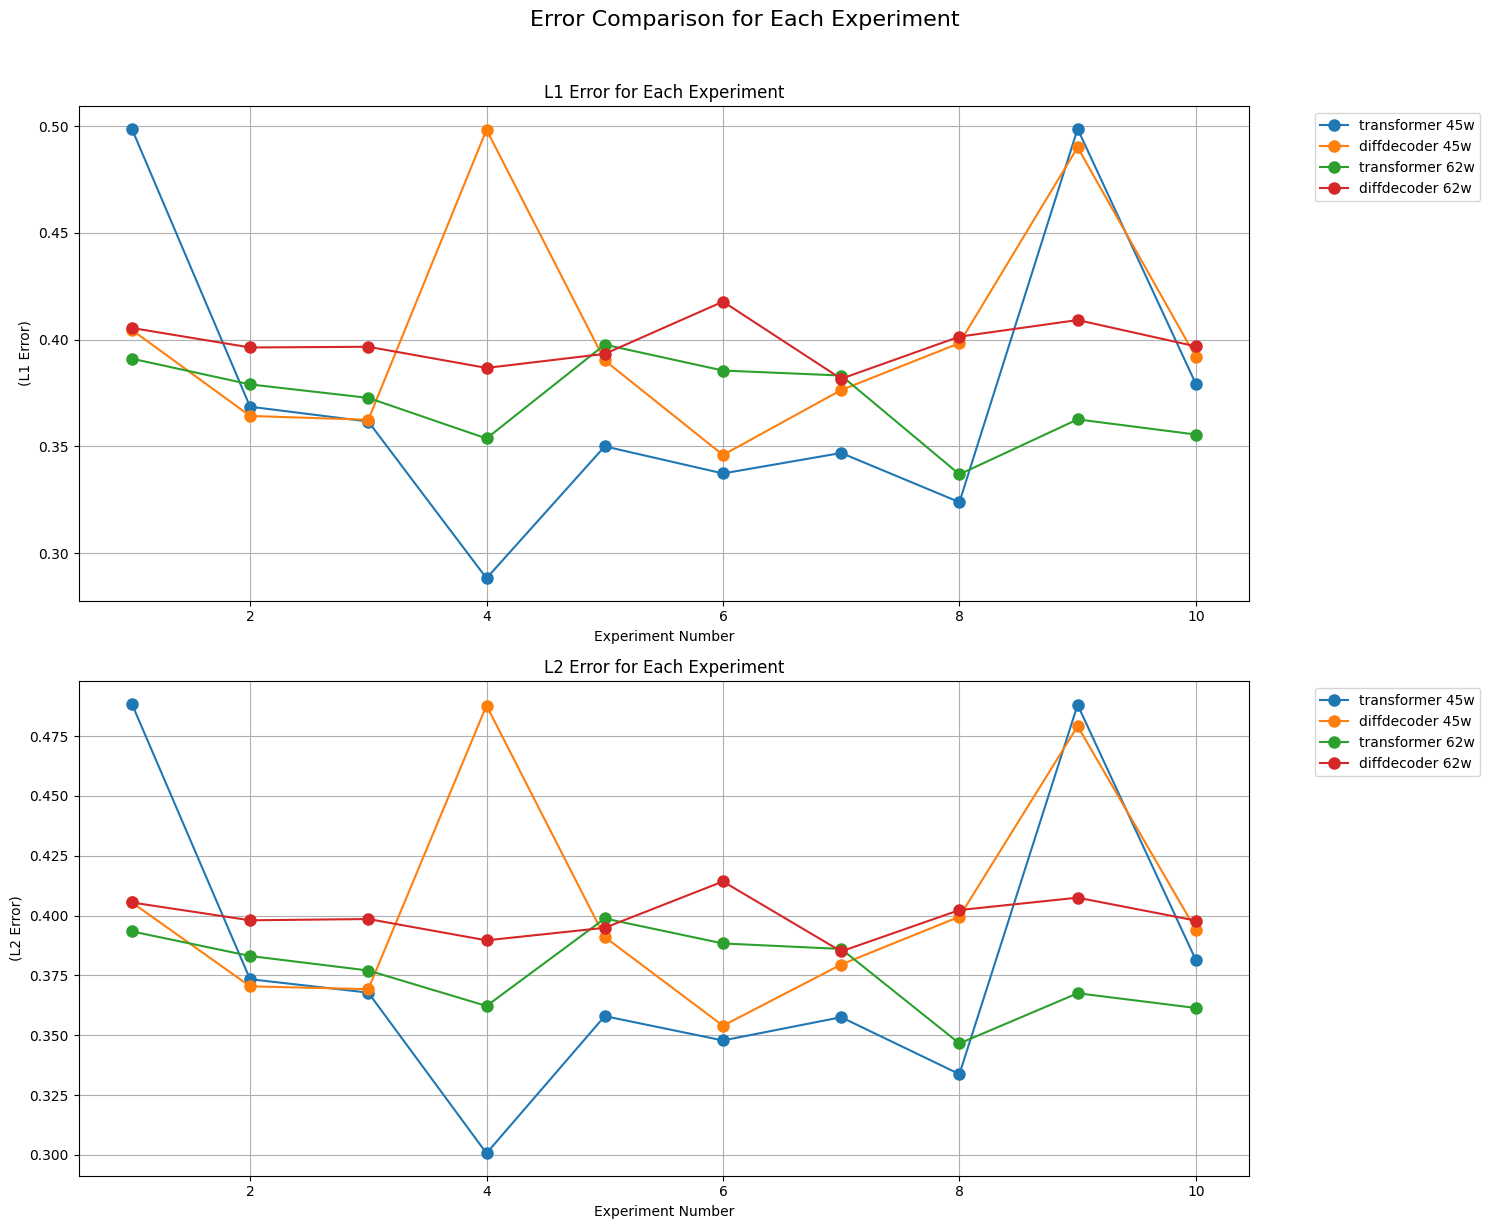

In [9]:
# 创建对数变换后的误差对比折线图
plt.figure(figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Error Comparison for Each Experiment', fontsize=16, y=1.02)

# 生成x轴标签（实验次数）
x = np.arange(1, len(next(iter(processed_data.values()))['L1']) + 1)

# 绘制L1误差的对数变换折线图
for model_name, data in processed_data.items():
    l1 = data['L1']  # 对数变换
    ax1.plot(x, l1, 'o-', label=model_name, markersize=8)
    
ax1.set_title('L1 Error for Each Experiment')
ax1.set_xlabel('Experiment Number')
ax1.set_ylabel('(L1 Error)')
ax1.grid(True)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 绘制L2误差的对数变换折线图
for model_name, data in processed_data.items():
    l2 = data['L2']  # 对数变换
    ax2.plot(x, l2, 'o-', label=model_name, markersize=8)
    
ax2.set_title('L2 Error for Each Experiment')
ax2.set_xlabel('Experiment Number')
ax2.set_ylabel('(L2 Error)')
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


